In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data and head()

In [2]:
data_file = "data/Chase Activity.xlsx"

In [36]:
df = pd.read_excel(data_file, sheetname="Summary")
df.head(5)

,Type,Trans Date,Post Date,Description,Amount,Kind,Expense
0,Sale,2016-12-31,2017-01-01,PAYPAL *DIGIZONE,-2.17,Goods,1
1,Sale,2016-12-31,2017-01-01,SQ *COOL TEA BAR WAVERLY,-8.72,Foods,1
2,Sale,2016-12-30,2017-01-01,TARGET 00003202,-29.61,Goods,1
3,Sale,2016-12-30,2017-01-01,99 RANCH #1769,-47.59,Groceries,1
4,Sale,2016-12-30,2017-01-01,A&amp;A GAS,-23.62,Auto,1


## Get Year-Month

In [4]:
def get_year_month(date):
    if date.month > 9:
        return f"{date.year}-{date.month}"
    else:
        return f"{date.year}-0{date.month}"

In [5]:
df['YearMonth'] = df['Trans Date'].map(get_year_month)

## Monthly Expense

In [6]:
monthly_expense = abs(df[df.Amount < 0.0].groupby("YearMonth").sum()[['Amount']])
monthly_expense

,Amount
YearMonth,
2016-09,1152.38
2016-10,3963.88
2016-11,4914.10
2016-12,4429.90


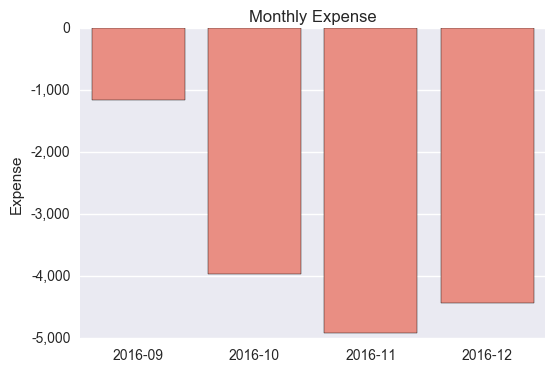

In [15]:
ax = sns.barplot(x='YearMonth', y='Amount', ci=None, data=df[df.Amount < 0], color="salmon", estimator=sum, order=monthly_expense.index)
ax.get_yaxis().set_major_formatter( matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Monthly Expense")
plt.xlabel("")
plt.ylabel("Expense")
plt.show()

## Compare (Last Month vs The month before Last Month

In [18]:
last_month = monthly_expense.index[-1]
month_before_last_month = monthly_expense.index[-2]

In [23]:
compare_df = df[(df.YearMonth == last_month) | (df.YearMonth == month_before_last_month)]

In [35]:
compare_df.groupby(["Kind", "YearMonth"]).sum()[['Amount']]

Amount
Kind       YearMonth         
Auto       2016-11    -492.09
           2016-12    -279.00
Clothing   2016-11    -551.96
           2016-12    -106.17
Coffee     2016-11     -27.45
           2016-12     -12.27
Etc        2016-12    -275.99
Foods      2016-11    -223.78
           2016-12    -358.85
Furniture  2016-11   -1380.38
           2016-12    -226.62
Goods      2016-11    -860.54
           2016-12   -1002.95
Groceries  2016-11    -956.82
           2016-12    -773.64
Internet   2016-11     -44.98
           2016-12     -79.99
Medical    2016-11     -20.00
           2016-12     -36.34
Membership 2016-11    -107.91
Music      2016-11     -16.97
Parking    2016-11      -3.00
Payment    2016-11     735.89
           2016-12    3688.28
Phone      2016-11    -132.39
           2016-12    -111.66
Return     2016-11     843.12
Study      2016-11     -13.00
           2016-12    -820.54
Travel     2016-12     -46.00
Unknown    2016-11     -46.00